In [4]:
import tensorflow as tf
from PIL import Image
import glob
import numpy as np
import scipy.ndimage.filters
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt

import skimage

from skimage import feature


print("imported")


imported


13779


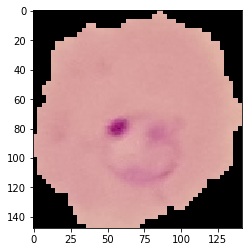

13779


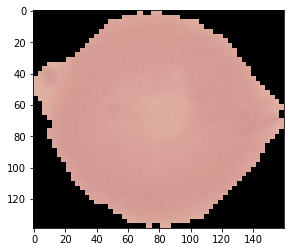

In [132]:
image_list_infect = []
for filename in glob.glob('./cell_images/Parasitized/*.png'):
    im=Image.open(filename)
    image_list_infect.append(im.copy())
    im.close()


print(len(image_list_infect))
plt.imshow(image_list_infect[0]) 
plt.show()  

image_list_uninfect = []
for filename in glob.glob('./cell_images/Uninfected/*.png'):
    im=Image.open(filename)
    image_list_uninfect.append(im.copy())
    im.close()

print(len(image_list_uninfect))
plt.imshow(image_list_uninfect[0]) 
plt.show()

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature, img_as_ubyte

from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter




thresh_list = [1,5,10,15,20,30,40]

for k in range(0,len(image_list_infect)):
    
    max_diff = 0
    low_thresh = 0
    high_thresh = 0
    for iii in range(0,len(thresh_list)):
        for jj in range(iii+1,len(thresh_list)):
            image_uninfect_rgb = image_list_uninfect[k]
            image_uninfect_gray = image_uninfect_rgb.convert('LA')            
            gray_uninfect_array = np.array(image_uninfect_gray)[:,:,0]

            
            edgeuninfect = feature.canny(gray_uninfect_array,sigma = 3,low_threshold=thresh_list[iii], high_threshold=thresh_list[jj])

            image_infect_rgb = image_list_infect[k]
            image_infect_gray = image_infect_rgb.convert('LA')            
            gray_infect_array = np.array(image_infect_gray)[:,:,0]

            
            edgeinfect = feature.canny(gray_infect_array,sigma = 3,low_threshold=thresh_list[iii], high_threshold=thresh_list[jj])
            max_val = np.amax(edgeuninfect)
            for j in range(0,edgeuninfect.shape[1]):
                for i in range(0,edgeuninfect.shape[0]):
                    if edgeuninfect[i][j] > .1*max_val:
                        edgeuninfect[i][j] = 0
                        if edgeuninfect[i+1][j] < .1*max_val:
                            break
                for ii in range(0,edgeuninfect.shape[0]):
                    i = edgeuninfect.shape[0] - ii -1
                    if edgeuninfect[i][j] > .1*max_val:
                        edgeuninfect[i][j] = 0
                        if edgeuninfect[i-1][j] < .1*max_val:
                            break
            max_val = np.amax(edgeinfect)
                            
            for j in range(0,edgeinfect.shape[1]):
                for i in range(0,edgeinfect.shape[0]):
                    if edgeinfect[i][j] > .1*max_val:
                        edgeinfect[i][j] = 0
                        if edgeinfect[i+1][j] < .1*max_val:
                            break
                for ii in range(0,edgeinfect.shape[0]):
                    i = edgeinfect.shape[0] - ii -1
                    if edgeinfect[i][j] > .1*max_val:
                        edgeinfect[i][j] = 0
                        if edgeinfect[i-1][j] < .1*max_val:
                            break 



            if (edgeinfect.sum() - edgeuninfect.sum() > max_diff):
                max_diff = edgeinfect.sum() - edgeuninfect.sum()
                low_thresh = thresh_list[iii]
                high_thresh = thresh_list[jj]
                
    print("difference of sum: ",max_diff,", low threshold: ",low_thresh,", high threshold: ",high_thresh)

difference of sum:  655 , low threshold:  1 , high threshold:  15
difference of sum:  617 , low threshold:  1 , high threshold:  5
difference of sum:  2033 , low threshold:  1 , high threshold:  20
difference of sum:  1424 , low threshold:  1 , high threshold:  5
difference of sum:  643 , low threshold:  1 , high threshold:  20
difference of sum:  326 , low threshold:  1 , high threshold:  15
difference of sum:  844 , low threshold:  1 , high threshold:  10
difference of sum:  828 , low threshold:  1 , high threshold:  15
difference of sum:  1975 , low threshold:  1 , high threshold:  10
difference of sum:  797 , low threshold:  1 , high threshold:  10
difference of sum:  487 , low threshold:  1 , high threshold:  15
difference of sum:  698 , low threshold:  1 , high threshold:  10
difference of sum:  1904 , low threshold:  1 , high threshold:  15
difference of sum:  563 , low threshold:  5 , high threshold:  10
difference of sum:  572 , low threshold:  1 , high threshold:  20
differen

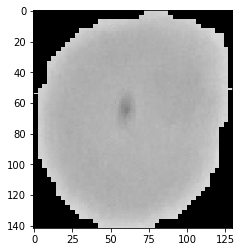

(142, 148)
(130, 142)


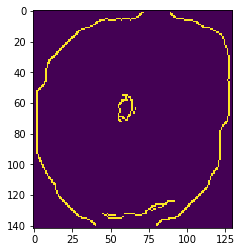

142  :  130


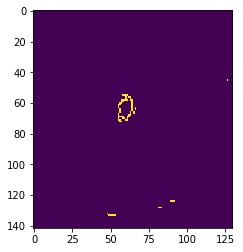

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import feature, img_as_ubyte

from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter


image_rgb = image_list_infect[6]

image_gray = image_rgb.convert('LA')

plt.imshow(image_gray) 
plt.show()


gray_array = np.array(image_gray)[:,:,0]


print(image_list_infect[0].size)
print(image_gray.size)

gray_array.shape


# plt.imshow(gray_array[:,:,0])
# plt.show()

# image_gray.type()

# finding low_threshold and hihg_threshold 

edges1 = feature.canny(gray_array,sigma = 3,low_threshold=5, high_threshold=20)


# low threshold around 10 and high threshold around 20

# edge_scharr = scharr(gray_array)

# edge_sobel = sobel(gray_array)
# edge_prewitt = prewitt(gray_array)


# edges1.shape

plt.imshow(edges1) 
plt.show()

print(edges1.shape[0]," : ", edges1.shape[1])

max_val = np.amax(edges1)


for j in range(0,edges1.shape[1]):
    for i in range(0,edges1.shape[0]):
        if edges1[i][j] > .1*max_val:
            edges1[i][j] = 0
            if edges1[i+1][j] < .1*max_val:
                break
    for ii in range(0,edges1.shape[0]):
        i = edges1.shape[0] - ii -1
        if edges1[i][j] > .1*max_val:
            edges1[i][j] = 0
            if edges1[i-1][j] < .1*max_val:
                break
        

plt.imshow(edges1) 
plt.show()

# plt.imshow(edge_scharr) 
# plt.show()

# plt.imshow(edge_sobel) 
# plt.show()

# plt.imshow(edge_prewitt) 
# plt.show()



# ellipses = hough_ellipse(edges1)


# ellipses.sort(order='accumulator')

# print(ellipses)

# # Estimated parameters for the ellipse
# best = list(ellipses[-1])
# yc, xc, a, b = [int(round(x)) for x in best[1:5]]
# orientation = best[5]

# # Draw the ellipse on the original image
# cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
# image_rgb[cy, cx] = (0, 0, 255)
# # Draw the edge (white) and the resulting ellipse (red)
# edges = color.gray2rgb(img_as_ubyte(edges))
# edges[cy, cx] = (250, 0, 0)
# plt.imshow(img_as_ubyte(ellipse)) 
# plt.show()


13779
13779


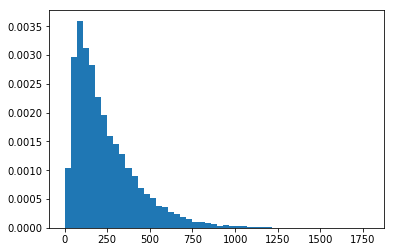

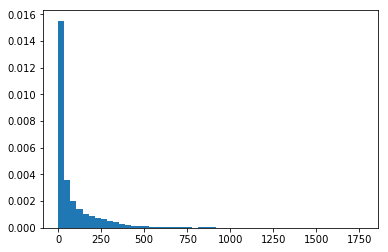

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature, img_as_ubyte
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

sum_inner_edges_infect = []
sum_inner_edges_uninfect = []




for k in range(0,len(image_list_infect)):
    

    image_uninfect_rgb = image_list_uninfect[k]
    image_uninfect_gray = image_uninfect_rgb.convert('LA')            
    gray_uninfect_array = np.array(image_uninfect_gray)[:,:,0]


    edgeuninfect = feature.canny(gray_uninfect_array,sigma = 3,low_threshold=5, high_threshold=20)

    image_infect_rgb = image_list_infect[k]
    image_infect_gray = image_infect_rgb.convert('LA')            
    gray_infect_array = np.array(image_infect_gray)[:,:,0]


    edgeinfect = feature.canny(gray_infect_array,sigma = 3,low_threshold=5, high_threshold=20)
    max_val = np.amax(edgeuninfect)
    for j in range(0,edgeuninfect.shape[1]):
        for i in range(0,edgeuninfect.shape[0]):
            if edgeuninfect[i][j] > .1*max_val:
                edgeuninfect[i][j] = 0
                if edgeuninfect[i+1][j] < .1*max_val:
                    break
        for ii in range(0,edgeuninfect.shape[0]):
            i = edgeuninfect.shape[0] - ii -1
            if edgeuninfect[i][j] > .1*max_val:
                edgeuninfect[i][j] = 0
                if edgeuninfect[i-1][j] < .1*max_val:
                    break




    sum_inner_edges_uninfect.append(edgeuninfect.sum())
    max_val = np.amax(edgeinfect)

    for j in range(0,edgeinfect.shape[1]):
        for i in range(0,edgeinfect.shape[0]):
            if edgeinfect[i][j] > .1*max_val:
                edgeinfect[i][j] = 0
                if edgeinfect[i+1][j] < .1*max_val:
                    break
        for ii in range(0,edgeinfect.shape[0]):
            i = edgeinfect.shape[0] - ii -1
            if edgeinfect[i][j] > .1*max_val:
                edgeinfect[i][j] = 0
                if edgeinfect[i-1][j] < .1*max_val:
                    break 

    sum_inner_edges_infect.append(edgeinfect.sum())



print(len(sum_inner_edges_infect))
print(len(sum_inner_edges_uninfect))

plt.hist(sum_inner_edges_infect, bins=50,normed=True)
plt.show()

plt.hist(sum_inner_edges_uninfect, bins=50,normed=True)
plt.show()
    
 

In [134]:
   
print(sum_inner_edges_infect[0:5])  
print(sum_inner_edges_uninfect[0:5])  

[380, 364, 119, 193, 90]
[20, 19, 9, 26, 9]


In [135]:
import pickle


with open('./pickle/sum_inner_edges_infect.pickle', 'wb') as handle:
    pickle.dump(sum_inner_edges_infect, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('./pickle/sum_inner_edges_uninfect.pickle', 'wb') as handle:
    pickle.dump(sum_inner_edges_uninfect, handle, protocol=pickle.HIGHEST_PROTOCOL)